# Seasonal trends example for Renato

### Function/package imports (I don't use all of these I just paste this into the beginning of all of my notebooks)

In [1]:
import sys
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/spectral_ice/')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/spectral_ice/Common/') # is this good or not good. I should reorg.
# sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable, cmaps,
    glob
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, regress_1d,
    to_png, polarCentral_set_latlim, add_map_features,
    stats, plot_trends
    )

from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load CERES-EBAF data

### You can load off of your laptop

In [2]:
ceres_dir = '/glade/work/jonahshaw/obs/CERES'
ceres_file = 'CERES_EBAF-TOA_Ed4.1_Subset_200003-202102.nc'

In [3]:
ceres_ds = xr.open_dataset('%s/%s' % (ceres_dir,ceres_file))

## Calculate a seasonal timeseries for the TOA SW flux

In [6]:
ceres_ds['toa_sw_all_mon']

<xarray.DataArray 'toa_sw_all_mon' (time: 252, lat: 180, lon: 360)>
[16329600 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2021-02-15
Attributes:
    long_name:      Top of The Atmosphere Shortwave Flux, All-Sky conditions,...
    standard_name:  TOA Shortwave Flux - All-Sky
    CF_name:        toa_outgoing_shortwave_flux
    comment:        none
    units:          W m-2
    valid_min:            0.00000
    valid_max:            600.000

### First calculate the Arctic area-weighted average

In [39]:
# These are just my functions for weighting and averaging, I know that you have your own.
sw_toa_wgt = add_weights(ceres_ds['toa_sw_all_mon'])

sw_toa_arcavg = masked_average(sw_toa_wgt,weights=sw_toa_wgt['cell_weight'],mask=sw_toa_wgt.lat<70,dim=['lat','lon'])

In [40]:
sw_toa_arcavg

<xarray.DataArray (time: 252)>
array([5.7330849e+01, 1.5413586e+02, 2.5807452e+02, 2.7168637e+02,
       2.2124892e+02, 1.5415511e+02, 7.4874092e+01, 1.7733805e+01,
       7.8359801e-01, 0.0000000e+00, 1.9092765e-01, 8.1727381e+00,
       5.5840912e+01, 1.5467303e+02, 2.5698737e+02, 2.8309409e+02,
       2.2455348e+02, 1.5548018e+02, 7.4496986e+01, 1.7492376e+01,
       8.0774617e-01, 0.0000000e+00, 1.9092765e-01, 8.1169844e+00,
       5.5461678e+01, 1.5387109e+02, 2.5391606e+02, 2.7015637e+02,
       2.2686421e+02, 1.5615619e+02, 7.3084244e+01, 1.7752203e+01,
       8.3947295e-01, 0.0000000e+00, 1.9092765e-01, 7.9191322e+00,
       5.5081486e+01, 1.5236845e+02, 2.5333588e+02, 2.7184558e+02,
       2.2261281e+02, 1.5645117e+02, 7.3983513e+01, 1.7823406e+01,
       9.0373421e-01, 0.0000000e+00, 1.9092765e-01, 8.1325216e+00,
       5.7066643e+01, 1.5515657e+02, 2.5518210e+02, 2.7358405e+02,
       2.2162720e+02, 1.5505882e+02, 7.3387581e+01, 1.7301495e+01,
       7.8832704e-01, 0.0000000e+00, 1.9092765e-01, 8.2496986e+00,
       5.5916489e+01, 1.5239720e+02, 2.5251199e+02, 2.6050668e+02,
       2.2100780e+02, 1.5268530e+02, 7.2176231e+01, 1.7316559e+01,
       8.0741304e-01, 0.0000000e+00, 1.9092765e-01, 8.0146666e+00,
       5.4238358e+01, 1.5147711e+02, 2.4983563e+02, 2.7319601e+02,
       2.2596947e+02, 1.5305780e+02, 7.2339767e+01, 1.7297020e+01,
...
       8.2838523e-01, 0.0000000e+00, 1.9092765e-01, 8.0003490e+00,
       5.4891315e+01, 1.5053067e+02, 2.5021793e+02, 2.6070267e+02,
       2.0886810e+02, 1.5060312e+02, 7.1713516e+01, 1.6858770e+01,
       8.6510324e-01, 0.0000000e+00, 1.9092765e-01, 8.1362896e+00,
       5.5494350e+01, 1.5070035e+02, 2.5061928e+02, 2.6105582e+02,
       2.1132219e+02, 1.4742815e+02, 6.9432167e+01, 1.6142328e+01,
       7.4650395e-01, 0.0000000e+00, 1.9092765e-01, 8.2902098e+00,
       5.6296562e+01, 1.5342751e+02, 2.5474022e+02, 2.7144019e+02,
       2.1905077e+02, 1.5439119e+02, 7.1201752e+01, 1.6874920e+01,
       7.9502499e-01, 0.0000000e+00, 1.9092765e-01, 8.1342869e+00,
       5.5025322e+01, 1.5086507e+02, 2.5453931e+02, 2.6743759e+02,
       2.2786357e+02, 1.5186240e+02, 7.1512123e+01, 1.6279722e+01,
       8.2771063e-01, 0.0000000e+00, 1.9092765e-01, 7.9116869e+00,
       5.4833076e+01, 1.5252194e+02, 2.4782607e+02, 2.5773398e+02,
       2.1109958e+02, 1.4724168e+02, 7.0006767e+01, 1.6787966e+01,
       8.4622288e-01, 0.0000000e+00, 1.9092765e-01, 8.3564396e+00,
       5.8525303e+01, 1.5675978e+02, 2.4909512e+02, 2.5993478e+02,
       2.0879517e+02, 1.4781642e+02, 6.9659645e+01, 1.6285130e+01,
       7.6917267e-01, 0.0000000e+00, 1.9092765e-01, 8.3032866e+00],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2021-02-15
Attributes:
    long_name:      Top of The Atmosphere Shortwave Flux, All-Sky conditions,...
    standard_name:  TOA Shortwave Flux - All-Sky
    CF_name:        toa_outgoing_shortwave_flux
    comment:        none
    units:          W m-2
    valid_min:            0.00000
    valid_max:            600.000

#### Groupby takes everything in the same season (ex. DJF) and groups it together, returning an iterable.

In [41]:
grouped_sw = sw_toa_arcavg.groupby('time.season')

In [42]:
# When I iterate over the grouped object, I get a string for the season and the grouped data
for i,_da in grouped_sw:
    print(i) # print season string
    print(_da) # print data

DJF
<xarray.DataArray (time: 63)>
array([0.        , 0.19092765, 8.172738  , 0.        , 0.19092765,
       8.116984  , 0.        , 0.19092765, 7.919132  , 0.        ,
       0.19092765, 8.132522  , 0.        , 0.19092765, 8.249699  ,
       0.        , 0.19092765, 8.014667  , 0.        , 0.19092765,
       7.847463  , 0.        , 0.19092765, 8.053033  , 0.        ,
       0.19092765, 8.18015   , 0.        , 0.19092765, 8.014351  ,
       0.        , 0.19092765, 8.085304  , 0.        , 0.19092765,
       8.118125  , 0.        , 0.19092765, 8.252226  , 0.        ,
       0.19092765, 8.146895  , 0.        , 0.19092765, 8.000349  ,
       0.        , 0.19092765, 8.13629   , 0.        , 0.19092765,
       8.29021   , 0.        , 0.19092765, 8.134287  , 0.        ,
       0.19092765, 7.911687  , 0.        , 0.19092765, 8.35644   ,
       0.        , 0.19092765, 8.303287  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-12-15 2001-01-15 ... 2021-02-15
Attributes:
    lo

#### Select just the Winter

In [43]:
for i,_da in grouped_sw:
    if i == 'DJF':
        print('I found the Winter group')
        winter_sw_toa = _da
        
        break

I found the Winter group


### Now we just have the months in Winter

In [44]:
winter_sw_toa

<xarray.DataArray (time: 63)>
array([0.        , 0.19092765, 8.172738  , 0.        , 0.19092765,
       8.116984  , 0.        , 0.19092765, 7.919132  , 0.        ,
       0.19092765, 8.132522  , 0.        , 0.19092765, 8.249699  ,
       0.        , 0.19092765, 8.014667  , 0.        , 0.19092765,
       7.847463  , 0.        , 0.19092765, 8.053033  , 0.        ,
       0.19092765, 8.18015   , 0.        , 0.19092765, 8.014351  ,
       0.        , 0.19092765, 8.085304  , 0.        , 0.19092765,
       8.118125  , 0.        , 0.19092765, 8.252226  , 0.        ,
       0.19092765, 8.146895  , 0.        , 0.19092765, 8.000349  ,
       0.        , 0.19092765, 8.13629   , 0.        , 0.19092765,
       8.29021   , 0.        , 0.19092765, 8.134287  , 0.        ,
       0.19092765, 7.911687  , 0.        , 0.19092765, 8.35644   ,
       0.        , 0.19092765, 8.303287  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-12-15 2001-01-15 ... 2021-02-15
Attributes:
    long_name:      Top of The Atmosphere Shortwave Flux, All-Sky conditions,...
    standard_name:  TOA Shortwave Flux - All-Sky
    CF_name:        toa_outgoing_shortwave_flux
    comment:        none
    units:          W m-2
    valid_min:            0.00000
    valid_max:            600.000

#### We want a yearly timeseries, so we need to average over years.

In this case, we need to use groupby again to separate each year and average the months within it.

In [45]:
winter_sw_toa.groupby('time.year')

DataArrayGroupBy, grouped over 'year' 
22 groups with labels 2000, 2001, 2002, ..., 2020, 2021.

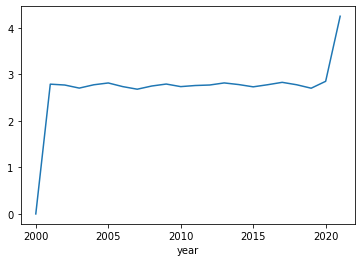

In [56]:
winter_sw_toa.groupby('time.year').mean('time').plot()

We can see that something is wrong here.^

#### But not all of the years have all three months of each season (i.e. 2000 does not have January or February and 2021 does not have march.)

So we should exclude incomplete years.

In [68]:
spring_timeseries = [] # initial

for i,_year in winter_sw_toa.groupby('time.year'):
    print(len(_year))

1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2


#### Only take years with a complete winter season (all 3 months).

In [58]:
complete_winter_years = [] # initialize empty list

for i,_year in winter_sw_toa.groupby('time.year'):
    if len(_year) == 3:
        complete_winter_years.append(_year.mean('time'))

#### Now we only have 20 complete years (2001-2020)

In [61]:
len(complete_winter_years)

20

#### Single line solution using list comprehension

In [59]:
complete_winter_years2 = [i[1].mean('time') for i in winter_sw_toa.groupby('time.year') if len(i[1]) == 3]

In [60]:
len(complete_winter_years2)

20

Average winter SW TOA values

In [65]:
final_out = np.array(complete_winter_years)

### There isn't much going on here, but that makes sense because there isn't much sun in the Arctic winter.

In [69]:
years = np.linspace(2001,2020,20)

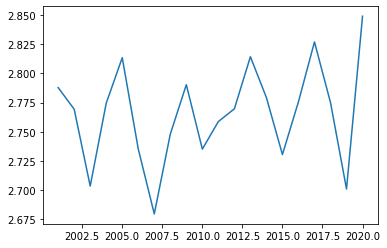

In [71]:
plt.plot(years,final_out)